## Telecom Churn

### Importing the data Data

In [41]:
# Loading the libraries and dataset

import numpy as np
import pandas as pd

churn_data = pd.read_csv("telecom_churn_data.csv", sep=",")

In [3]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading the dataset

churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Understanding the structure of the dataframe

In [5]:
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### Data Preparation - Cleaning and Manupulating the data

In [6]:
# Creating new column that gives the average total recharge for months 6 and 7

churn_data['total_recharge_6'] = churn_data['total_rech_amt_6']
churn_data['total_recharge_7'] = churn_data['total_rech_amt_7']

churn_data['average_total_recharge_6_7'] = (churn_data['total_recharge_6'] + churn_data['total_recharge_7'])/2

# Taking the 70th percenile of the value

churn_data['average_total_recharge_6_7'].quantile(0.7)

368.5

In [7]:
# The threshold value for high-value customers is 368.5 and now filtering the data using this value

churn_data = churn_data.loc[churn_data['average_total_recharge_6_7'] >= 368.5]
churn_data

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharge_6,total_recharge_7,average_total_recharge_6_7
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,802,57.74,19.38,18.74,0.00,1580,790,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,1.0,NaN,315,21.03,910.65,122.16,0.00,437,601,519.0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,1.0,NaN,2607,0.00,0.00,0.00,0.00,507,253,380.0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,511,0.00,2.45,21.89,0.00,570,348,459.0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,NaN,NaN,667,0.00,0.00,0.00,0.00,816,0,408.0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,NaN,720,0.00,0.00,0.00,0.00,600,680,640.0
24,7001125315,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,422.050,...,NaN,NaN,3072,0.00,0.00,0.00,0.00,440,330,385.0
33,7000149764,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,977.020,...,1.0,1.0,1328,358.10,2706.83,1714.67,0.00,1058,2806,1932.0
38,7000815202,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,363.987,...,NaN,0.0,1155,0.00,0.00,0.00,0.00,420,636,528.0
41,7000721289,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,482.832,...,NaN,NaN,2010,0.00,0.00,0.00,0.00,496,510,503.0


In [8]:
# We get around 30k high-value customers
# Now we create a new dataframe called "churn" containing only useful values that are more indicative of churn

churn = churn_data[["mobile_number",'vol_2g_mb_6','vol_3g_mb_6','vol_2g_mb_7','vol_3g_mb_7','vol_2g_mb_8','vol_3g_mb_8'
                ,'vol_2g_mb_9','vol_3g_mb_9',"total_og_mou_6","total_og_mou_7","total_og_mou_8",
               "total_og_mou_9","total_ic_mou_6","total_ic_mou_7","total_ic_mou_8","total_ic_mou_9"]]

churn.head()

,mobile_number,vol_2g_mb_6,vol_3g_mb_6,vol_2g_mb_7,vol_3g_mb_7,vol_2g_mb_8,vol_3g_mb_8,vol_2g_mb_9,vol_3g_mb_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9
7,7000701601,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,487.53,609.24,350.16,0.00,626.46,558.04,428.74,0.00
8,7001524846,0.0,0.0,356.0,750.95,0.03,11.94,0.0,0.0,508.36,431.66,171.56,142.18,103.86,28.49,16.54,34.91
13,7002191713,0.0,0.0,0.0,0.00,0.02,0.00,0.0,0.0,907.09,192.41,1015.26,446.09,968.61,172.58,1144.53,631.86
16,7000875565,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,346.81,286.01,233.38,255.74,364.86,381.56,294.46,334.56
17,7000187447,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,1249.53,0.81,0.00,631.08,91.88,2.31,0.00,87.13


In [9]:
# Checking for null values

churn.isnull().sum()

mobile_number     0
vol_2g_mb_6       0
vol_3g_mb_6       0
vol_2g_mb_7       0
vol_3g_mb_7       0
vol_2g_mb_8       0
vol_3g_mb_8       0
vol_2g_mb_9       0
vol_3g_mb_9       0
total_og_mou_6    0
total_og_mou_7    0
total_og_mou_8    0
total_og_mou_9    0
total_ic_mou_6    0
total_ic_mou_7    0
total_ic_mou_8    0
total_ic_mou_9    0
dtype: int64

### Tag churners and remove attributes of the churn

In [10]:
# To tag users as churn or not churn, using functions to determine whether users received incoming calls, made outgoing calls,
# used 2g and 3g data

def total_ic_mou_9(x):
    if x == 0:
        return "No Usage"
    else:
        return "Active"
    
churn['IC_mou_9'] = churn['total_ic_mou_9'].apply(total_ic_mou_9)

def total_og_mou_9(x):
    if x == 0:
        return "No Usage"
    else:
        return "Active"
    
churn['OG_mou_9'] = churn['total_og_mou_9'].apply(total_og_mou_9)

def vol_2g_mb_9 (x):
    if x == 0:
        return "No Usage"
    else:
        return "Active"
    
churn['2G_mb_9'] = churn['vol_2g_mb_9'].apply(vol_2g_mb_9)

def vol_3g_mb_9 (x):
    if x == 0:
        return "No Usage"
    else:
        return "Active"
    
churn['3G_mb_9'] = churn['vol_3g_mb_9'].apply(vol_3g_mb_9)

In [11]:
# Creating a new function to tag churned users

def f(row):
    if row["IC_mou_9"] == "No Usage" and row["OG_mou_9"] == "No Usage" and row["2G_mb_9"] == "No Usage" and row["3G_mb_9"] == "No Usage":
        return "1"
    else:
        return "0"

In [12]:
# checking to see churn rate in a new column "Churned"

churn['Churned'] = churn.apply(f, axis=1)

In [13]:
# Checking to see update

churn.head()

,mobile_number,vol_2g_mb_6,vol_3g_mb_6,vol_2g_mb_7,vol_3g_mb_7,vol_2g_mb_8,vol_3g_mb_8,vol_2g_mb_9,vol_3g_mb_9,total_og_mou_6,...,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,IC_mou_9,OG_mou_9,2G_mb_9,3G_mb_9,Churned
7,7000701601,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,487.53,...,0.00,626.46,558.04,428.74,0.00,No Usage,No Usage,No Usage,No Usage,1
8,7001524846,0.0,0.0,356.0,750.95,0.03,11.94,0.0,0.0,508.36,...,142.18,103.86,28.49,16.54,34.91,Active,Active,No Usage,No Usage,0
13,7002191713,0.0,0.0,0.0,0.00,0.02,0.00,0.0,0.0,907.09,...,446.09,968.61,172.58,1144.53,631.86,Active,Active,No Usage,No Usage,0
16,7000875565,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,346.81,...,255.74,364.86,381.56,294.46,334.56,Active,Active,No Usage,No Usage,0
17,7000187447,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,1249.53,...,631.08,91.88,2.31,0.00,87.13,Active,Active,No Usage,No Usage,0


In [14]:
# Calculating the Churn Rate

churn["Churned"]= churn["Churned"].astype(int)

churn_rate = (sum(churn['Churned'])/len(churn['Churned'].index))*100
churn_rate

8.64016527273333

In [15]:
# Getting the list of columns

churn.columns

Index(['mobile_number', 'vol_2g_mb_6', 'vol_3g_mb_6', 'vol_2g_mb_7',
       'vol_3g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_8', 'vol_2g_mb_9',
       'vol_3g_mb_9', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'total_og_mou_9', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_ic_mou_9', 'IC_mou_9', 'OG_mou_9', '2G_mb_9', '3G_mb_9',
       'Churned'],
      dtype='object')

In [16]:
# Dropping month 9 related columns

churn = churn.drop(columns = ['vol_2g_mb_9','vol_3g_mb_9','total_og_mou_9','total_ic_mou_9'])

churn.head()

,mobile_number,vol_2g_mb_6,vol_3g_mb_6,vol_2g_mb_7,vol_3g_mb_7,vol_2g_mb_8,vol_3g_mb_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,IC_mou_9,OG_mou_9,2G_mb_9,3G_mb_9,Churned
7,7000701601,0.0,0.0,0.0,0.00,0.00,0.00,487.53,609.24,350.16,626.46,558.04,428.74,No Usage,No Usage,No Usage,No Usage,1
8,7001524846,0.0,0.0,356.0,750.95,0.03,11.94,508.36,431.66,171.56,103.86,28.49,16.54,Active,Active,No Usage,No Usage,0
13,7002191713,0.0,0.0,0.0,0.00,0.02,0.00,907.09,192.41,1015.26,968.61,172.58,1144.53,Active,Active,No Usage,No Usage,0
16,7000875565,0.0,0.0,0.0,0.00,0.00,0.00,346.81,286.01,233.38,364.86,381.56,294.46,Active,Active,No Usage,No Usage,0
17,7000187447,0.0,0.0,0.0,0.00,0.00,0.00,1249.53,0.81,0.00,91.88,2.31,0.00,Active,Active,No Usage,No Usage,0


In [17]:
# Converting to 1 and 0

churn['OG_mou_9'] = churn['OG_mou_9'].map({'No Usage': 0, 'Active': 1})
churn['IC_mou_9'] = churn['IC_mou_9'].map({'No Usage': 0, 'Active': 1})
churn['2G_mb_9'] = churn['2G_mb_9'].map({'No Usage': 0, 'Active': 1})
churn['3G_mb_9'] = churn['3G_mb_9'].map({'No Usage': 0, 'Active': 1})

#### Conducting further data cleaning after tagging high-value customers as churn 1 or churn 0

In [18]:
# Reusing updated dataset in new dataframe called "df_1" 

df_1 = churn_data

In [19]:
# checking to see df_1

df_1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharge_6,total_recharge_7,average_total_recharge_6_7
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,802,57.74,19.38,18.74,0.0,1580,790,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,1.0,NaN,315,21.03,910.65,122.16,0.0,437,601,519.0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,1.0,NaN,2607,0.00,0.00,0.00,0.0,507,253,380.0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,511,0.00,2.45,21.89,0.0,570,348,459.0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,NaN,NaN,667,0.00,0.00,0.00,0.0,816,0,408.0


In [20]:
# Keeping only the columns that would be a predictor of churn based on relevance

df_1 = df_1[["mobile_number","total_og_mou_6","total_og_mou_7","total_og_mou_8","total_og_mou_9","total_ic_mou_6",
                    "total_ic_mou_7","total_ic_mou_8","total_ic_mou_9","loc_og_t2c_mou_6","loc_og_t2c_mou_7","loc_og_t2c_mou_8",
                    "loc_og_t2c_mou_9","std_og_t2c_mou_6","std_og_t2c_mou_7","std_og_t2c_mou_8","std_og_t2c_mou_9","loc_og_t2m_mou_6",
                    "loc_og_t2m_mou_7","loc_og_t2m_mou_8","loc_og_t2m_mou_9","std_og_t2m_mou_6","std_og_t2m_mou_7","std_og_t2m_mou_8",
                    "std_og_t2m_mou_9","loc_ic_t2m_mou_6","loc_ic_t2m_mou_7","loc_ic_t2m_mou_8","loc_ic_t2m_mou_9","std_ic_t2m_mou_6",
                    "std_ic_t2m_mou_7","std_ic_t2m_mou_8","std_ic_t2m_mou_9","vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8","vol_2g_mb_9","vol_3g_mb_6","vol_3g_mb_7","vol_3g_mb_8",
                    "vol_3g_mb_9",'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','total_rech_data_6','total_rech_data_7'
                    ,'total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']]

df_1.head()

,mobile_number,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,loc_og_t2c_mou_6,...,total_rech_amt_8,total_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
7,7000701601,487.53,609.24,350.16,0.00,626.46,558.04,428.74,0.00,0.0,...,3638,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7001524846,508.36,431.66,171.56,142.18,103.86,28.49,16.54,34.91,0.0,...,120,186,NaN,2.0,3.0,NaN,NaN,177.0,69.0,NaN
13,7002191713,907.09,192.41,1015.26,446.09,968.61,172.58,1144.53,631.86,0.0,...,717,353,NaN,NaN,3.0,NaN,NaN,NaN,69.0,NaN
16,7000875565,346.81,286.01,233.38,255.74,364.86,381.56,294.46,334.56,0.0,...,160,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,7000187447,1249.53,0.81,0.00,631.08,91.88,2.31,0.00,87.13,0.0,...,30,335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# The idea here is to see whether a user was in frequent contact with a competitor which would indicate if they are planning
# to switch. Also, to see the calls made to the original operator which is indicative of complaints or follow-ups.

# Aggregating local outgoing and std ourgoing to t2m (competitor) for months 6, 7, 8 and 9

df_1['total_t2m_mou_6'] = df_1.loc_og_t2m_mou_6 + df_1.std_og_t2m_mou_6
df_1['total_t2m_mou_7'] = df_1.loc_og_t2m_mou_7 + df_1.std_og_t2m_mou_7
df_1['total_t2m_mou_8'] = df_1.loc_og_t2m_mou_8 + df_1.std_og_t2m_mou_8
df_1['total_t2m_mou_9'] = df_1.loc_og_t2m_mou_9 + df_1.std_og_t2m_mou_9

# Aggregating local incoming and std incoming from t2m (competitor) for months 6, 7, 8 and 9

df_1['total_ic_t2m_mou_6'] = df_1.loc_ic_t2m_mou_6 + df_1.std_ic_t2m_mou_6
df_1['total_ic_t2m_mou_7'] = df_1.loc_ic_t2m_mou_7 + df_1.std_ic_t2m_mou_7
df_1['total_ic_t2m_mou_8'] = df_1.loc_ic_t2m_mou_8 + df_1.std_ic_t2m_mou_8
df_1['total_ic_t2m_mou_9'] = df_1.loc_ic_t2m_mou_9 + df_1.std_ic_t2m_mou_9

# Aggregating local outgoing and std outgoing to t2c (self) for months 6, 7, 8 and 9

df_1['total_og_t2c_mou_6'] = df_1.loc_og_t2c_mou_6 + df_1.std_og_t2c_mou_6
df_1['total_og_t2c_mou_7'] = df_1.loc_og_t2c_mou_7 + df_1.std_og_t2c_mou_7
df_1['total_og_t2c_mou_8'] = df_1.loc_og_t2c_mou_8 + df_1.std_og_t2c_mou_8
df_1['total_og_t2c_mou_9'] = df_1.loc_og_t2c_mou_9 + df_1.std_og_t2c_mou_9

# Dropping redundant columns

df_1 = df_1.drop(columns = ['loc_og_t2m_mou_6','std_og_t2m_mou_6','loc_og_t2m_mou_7','std_og_t2m_mou_7',
                              'loc_og_t2m_mou_8','std_og_t2m_mou_8','loc_og_t2m_mou_9','std_og_t2m_mou_9'
                              ,'loc_ic_t2m_mou_6','std_ic_t2m_mou_6','loc_ic_t2m_mou_7','std_ic_t2m_mou_7',
                              'loc_ic_t2m_mou_8','std_ic_t2m_mou_8','loc_ic_t2m_mou_9','std_ic_t2m_mou_9',
                              'loc_og_t2c_mou_6','std_og_t2c_mou_6','loc_og_t2c_mou_7','std_og_t2c_mou_7',
                              'loc_og_t2c_mou_8','std_og_t2c_mou_8','loc_og_t2c_mou_9','std_og_t2c_mou_9'])

df_1.head()

,mobile_number,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,vol_2g_mb_6,...,total_t2m_mou_8,total_t2m_mou_9,total_ic_t2m_mou_6,total_ic_t2m_mou_7,total_ic_t2m_mou_8,total_ic_t2m_mou_9,total_og_t2c_mou_6,total_og_t2c_mou_7,total_og_t2c_mou_8,total_og_t2c_mou_9
7,7000701601,487.53,609.24,350.16,0.00,626.46,558.04,428.74,0.00,0.0,...,211.42,NaN,309.00,348.48,262.52,NaN,0.0,0.0,0.00,NaN
8,7001524846,508.36,431.66,171.56,142.18,103.86,28.49,16.54,34.91,0.0,...,126.23,108.71,80.01,18.06,16.13,30.87,0.0,0.0,7.15,0.0
13,7002191713,907.09,192.41,1015.26,446.09,968.61,172.58,1144.53,631.86,0.0,...,451.40,204.25,451.01,48.32,513.09,256.30,0.0,0.0,0.49,0.0
16,7000875565,346.81,286.01,233.38,255.74,364.86,381.56,294.46,334.56,0.0,...,146.57,215.28,245.49,222.77,224.09,202.44,0.0,0.0,0.00,0.0
17,7000187447,1249.53,0.81,0.00,631.08,91.88,2.31,0.00,87.13,0.0,...,0.00,87.89,48.69,2.31,0.00,45.49,0.0,0.0,0.00,0.0


In [22]:
# Checking for missing values

df_1.isnull().sum()

mobile_number             0
total_og_mou_6            0
total_og_mou_7            0
total_og_mou_8            0
total_og_mou_9            0
total_ic_mou_6            0
total_ic_mou_7            0
total_ic_mou_8            0
total_ic_mou_9            0
vol_2g_mb_6               0
vol_2g_mb_7               0
vol_2g_mb_8               0
vol_2g_mb_9               0
vol_3g_mb_6               0
vol_3g_mb_7               0
vol_3g_mb_8               0
vol_3g_mb_9               0
total_rech_amt_6          0
total_rech_amt_7          0
total_rech_amt_8          0
total_rech_amt_9          0
total_rech_data_6     18614
total_rech_data_7     18349
total_rech_data_8     18257
total_rech_data_9     18550
av_rech_amt_data_6    18614
av_rech_amt_data_7    18349
av_rech_amt_data_8    18257
av_rech_amt_data_9    18550
total_t2m_mou_6         316
total_t2m_mou_7         303
total_t2m_mou_8         938
total_t2m_mou_9        1704
total_ic_t2m_mou_6      316
total_ic_t2m_mou_7      303
total_ic_t2m_mou_8  

In [23]:
# Dropping missing columns which cannot be imputed nor are required for modelling

df_1 = df_1.drop(columns = ["total_rech_data_6","total_rech_data_7","total_rech_data_8",
                            "total_rech_data_9","av_rech_amt_data_6","av_rech_amt_data_7",
                            "av_rech_amt_data_8","av_rech_amt_data_9"])
df_1.isnull().sum()

mobile_number            0
total_og_mou_6           0
total_og_mou_7           0
total_og_mou_8           0
total_og_mou_9           0
total_ic_mou_6           0
total_ic_mou_7           0
total_ic_mou_8           0
total_ic_mou_9           0
vol_2g_mb_6              0
vol_2g_mb_7              0
vol_2g_mb_8              0
vol_2g_mb_9              0
vol_3g_mb_6              0
vol_3g_mb_7              0
vol_3g_mb_8              0
vol_3g_mb_9              0
total_rech_amt_6         0
total_rech_amt_7         0
total_rech_amt_8         0
total_rech_amt_9         0
total_t2m_mou_6        316
total_t2m_mou_7        303
total_t2m_mou_8        938
total_t2m_mou_9       1704
total_ic_t2m_mou_6     316
total_ic_t2m_mou_7     303
total_ic_t2m_mou_8     938
total_ic_t2m_mou_9    1704
total_og_t2c_mou_6     316
total_og_t2c_mou_7     303
total_og_t2c_mou_8     938
total_og_t2c_mou_9    1704
dtype: int64

In [24]:
# Removing missing rows and will not remove significant amount of data

df_1.dropna(inplace=True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Data columns (total 33 columns):
mobile_number         27991 non-null int64
total_og_mou_6        27991 non-null float64
total_og_mou_7        27991 non-null float64
total_og_mou_8        27991 non-null float64
total_og_mou_9        27991 non-null float64
total_ic_mou_6        27991 non-null float64
total_ic_mou_7        27991 non-null float64
total_ic_mou_8        27991 non-null float64
total_ic_mou_9        27991 non-null float64
vol_2g_mb_6           27991 non-null float64
vol_2g_mb_7           27991 non-null float64
vol_2g_mb_8           27991 non-null float64
vol_2g_mb_9           27991 non-null float64
vol_3g_mb_6           27991 non-null float64
vol_3g_mb_7           27991 non-null float64
vol_3g_mb_8           27991 non-null float64
vol_3g_mb_9           27991 non-null float64
total_rech_amt_6      27991 non-null int64
total_rech_amt_7      27991 non-null int64
total_rech_amt_8      27991 non-null int64

In [25]:
# Adding Churned column to df_1

df_1["Churned"] = churn["Churned"]

### Normalization phase

In [26]:
# Normalizing continuous features

a = df_1[["total_og_mou_6","total_og_mou_7","total_og_mou_8","total_og_mou_9",
              "total_ic_mou_6","total_ic_mou_7","total_ic_mou_8","total_ic_mou_9","vol_2g_mb_6",
              "vol_2g_mb_7","vol_2g_mb_8","vol_2g_mb_9","vol_3g_mb_6","vol_3g_mb_7","vol_3g_mb_8",
              "vol_3g_mb_9","total_rech_amt_6","total_rech_amt_7","total_rech_amt_8","total_rech_amt_9",
              "total_t2m_mou_6","total_t2m_mou_7","total_t2m_mou_8","total_t2m_mou_9","total_ic_t2m_mou_6",
              "total_ic_t2m_mou_7","total_ic_t2m_mou_8","total_ic_t2m_mou_9","total_og_t2c_mou_6",
              "total_og_t2c_mou_7","total_og_t2c_mou_8","total_og_t2c_mou_9"]]

In [27]:
normalized_a=(a-a.mean())/a.std()

df_1 = df_1.drop(["total_og_mou_6","total_og_mou_7","total_og_mou_8","total_og_mou_9",
              "total_ic_mou_6","total_ic_mou_7","total_ic_mou_8","total_ic_mou_9","vol_2g_mb_6",
              "vol_2g_mb_7","vol_2g_mb_8","vol_2g_mb_9","vol_3g_mb_6","vol_3g_mb_7","vol_3g_mb_8",
              "vol_3g_mb_9","total_rech_amt_6","total_rech_amt_7","total_rech_amt_8","total_rech_amt_9",
              "total_t2m_mou_6","total_t2m_mou_7","total_t2m_mou_8","total_t2m_mou_9","total_ic_t2m_mou_6",
              "total_ic_t2m_mou_7","total_ic_t2m_mou_8","total_ic_t2m_mou_9","total_og_t2c_mou_6",
              "total_og_t2c_mou_7","total_og_t2c_mou_8","total_og_t2c_mou_9"], 1)

df_1 = pd.concat([df_1,normalized_a],axis=1)
df_1.head()

,mobile_number,Churned,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,...,total_t2m_mou_8,total_t2m_mou_9,total_ic_t2m_mou_6,total_ic_t2m_mou_7,total_ic_t2m_mou_8,total_ic_t2m_mou_9,total_og_t2c_mou_6,total_og_t2c_mou_7,total_og_t2c_mou_8,total_og_t2c_mou_9
8,7001524846,0,-0.272106,-0.423303,-0.701383,-0.695009,-0.582344,-0.796348,-0.806959,-0.723987,...,-0.504644,-0.512118,-0.465246,-0.731527,-0.707056,-0.645319,-0.228954,-0.206234,0.713078,-0.235027
13,7002191713,0,0.343251,-0.775251,0.526533,-0.231534,1.834518,-0.407443,2.281981,0.929430,...,0.186172,-0.294179,1.040290,-0.609718,1.267214,0.311284,-0.228954,-0.206234,-0.170316,-0.235027
16,7000875565,0,-0.521425,-0.637561,-0.611411,-0.521826,0.147116,0.156604,-0.045890,0.105976,...,-0.461432,-0.269018,0.206280,0.092514,0.119106,0.082732,-0.228954,-0.206234,-0.235310,-0.235027
17,7000187447,0,0.871735,-1.057104,-0.951071,0.050583,-0.615827,-0.867009,-0.852253,-0.579349,...,-0.772817,-0.559612,-0.592344,-0.794927,-0.771135,-0.583279,-0.228954,-0.206234,-0.235310,-0.235027
21,7002124215,0,0.271102,0.455104,0.604077,0.661286,-0.293830,-0.517267,-0.137409,-0.121007,...,1.312995,1.224213,-0.035458,-0.349918,0.146160,0.112436,-0.228954,-0.206234,-0.235310,-0.235027


### Model Building
Splitting our data into a training set and a test set.

In [28]:
# Train-test split

from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df_1.drop(['Churned','mobile_number'],axis=1)

# Putting response variable to y
y = df_1['Churned']

y.head()

8     0
13    0
16    0
17    0
21    0
Name: Churned, dtype: int32

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [30]:
X_train.shape

(19593, 32)

### PCA Projection to 2D
We have 32 variables after creating our dummy variables for our categories

In [31]:
# Importing required library

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=np.random)

In [32]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None,
    random_state=<module 'numpy.random' from 'C:\\Users\\Neerja\\Anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>,
    svd_solver='randomized', tol=0.0, whiten=False)

In [33]:
pca.components_

array([[ 0.17346943,  0.19856885,  0.20948586, ...,  0.01249857,
         0.01682108,  0.01948512],
       [ 0.22435888,  0.26859195,  0.25353467, ...,  0.03235669,
         0.03512953,  0.03371994],
       [-0.07443501, -0.07744391, -0.05099894, ...,  0.01372448,
         0.01338589,  0.01826646],
       ...,
       [ 0.0263536 , -0.0129594 , -0.11759754, ..., -0.00425992,
         0.0071254 , -0.00472652],
       [ 0.1466359 , -0.39332282,  0.49799189, ...,  0.01347986,
        -0.01856409,  0.00995693],
       [-0.03617127,  0.11227238, -0.13140881, ..., -0.00123754,
         0.00139521, -0.00192438]])

#### Plot the principal components
- We'll plot original features on the first 2 principal components as axes

In [37]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1]})
pcs_df

,Feature,PC1,PC2
0,total_og_mou_6,0.173469,0.224359
1,total_og_mou_7,0.198569,0.268592
2,total_og_mou_8,0.209486,0.253535
3,total_og_mou_9,0.207958,0.234703
4,total_ic_mou_6,0.229194,-0.255782
5,total_ic_mou_7,0.247148,-0.255885
6,total_ic_mou_8,0.258702,-0.252459
7,total_ic_mou_9,0.245246,-0.229138
8,vol_2g_mb_6,-0.024587,-0.049752
9,vol_2g_mb_7,-0.025988,-0.046530


In [35]:
import matplotlib.pyplot as plt

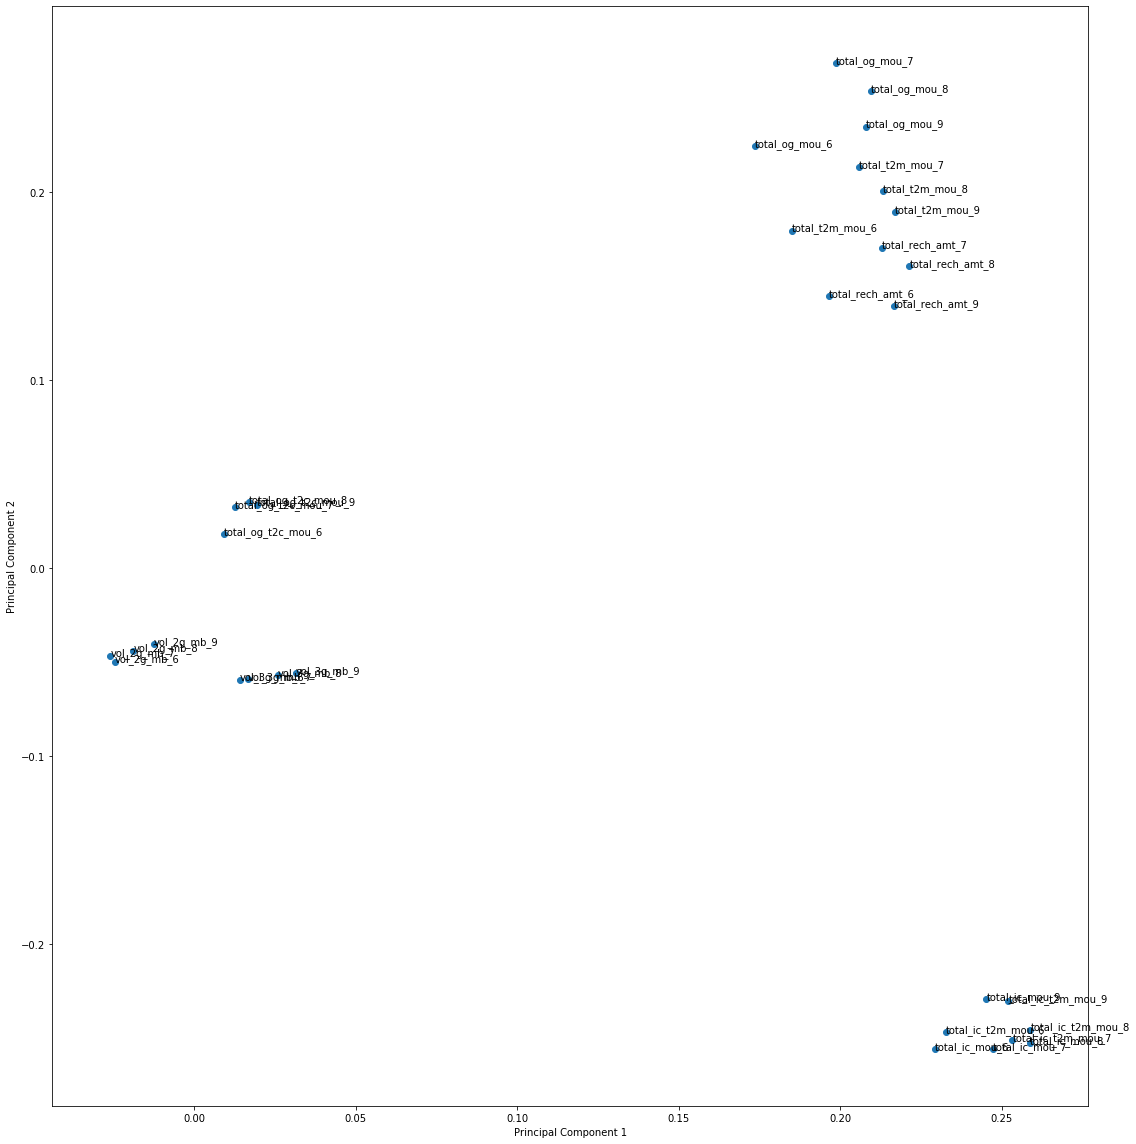

In [36]:
%matplotlib inline
fig = plt.figure(figsize = (16,16))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [60]:
pca.explained_variance_ratio_

array([0.21847731, 0.15466204, 0.11634149, 0.08652313, 0.06399781,
       0.0562584 , 0.04010582, 0.02679078, 0.02563471, 0.02270237,
       0.02022413, 0.0191824 , 0.01666992, 0.01477698, 0.01456959,
       0.01378792, 0.01224162, 0.0103067 , 0.01019799, 0.00900234,
       0.00799141, 0.00715402, 0.00640123, 0.00612131, 0.00448749,
       0.003947  , 0.00360733, 0.0026331 , 0.00202261, 0.00121469,
       0.00114729, 0.00081903])

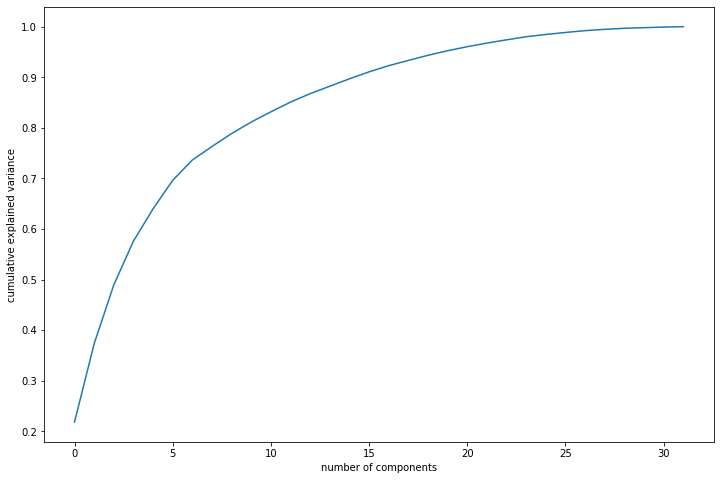

In [61]:
# Plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 18 components are enough to describe 95% of the variance in the dataset
- We'll choose 18 components for our modeling

In [62]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=18)

#### Basis transformation - getting the data onto our PCs

In [63]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(19593, 18)

In [64]:
# Creating correlation matrix for the principal components

corr_1 = np.corrcoef(df_train_pca.transpose())

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [65]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

In [66]:
import seaborn as sns

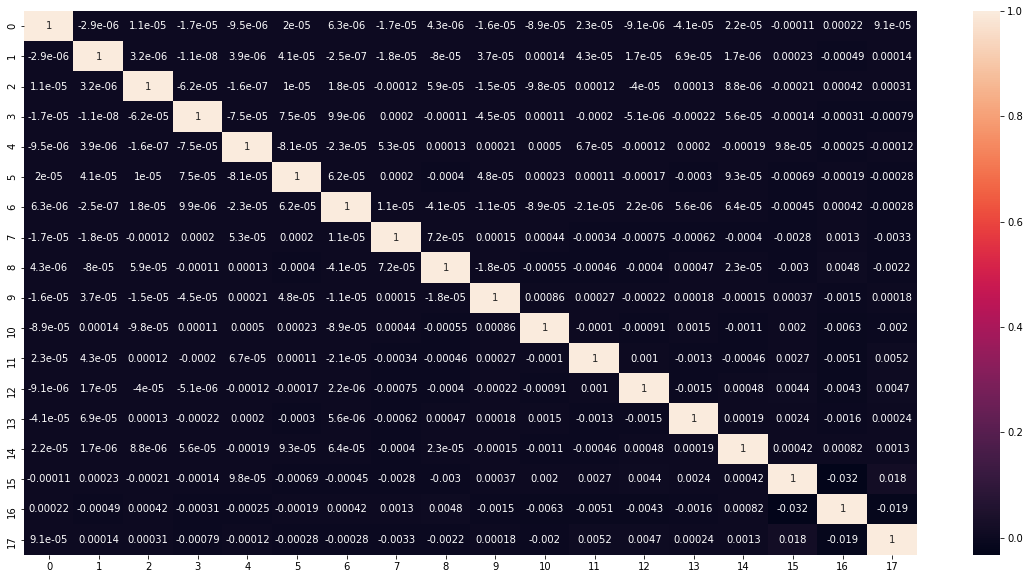

In [67]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [68]:
# Applying selected components to the test data - 18 components

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8398, 18)

### Logistic Regression Model for predicting churn of high-value customers

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [39]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [71]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.98'

#### The Logistic Regression model gives us an AUC score of 0.98

### Decision Tree Model 

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#### Evaluating Model

In [75]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


We got a classification rate of 100%, considered as good accuracy. 
This is because the parameters for the decision tree model were already tunned up!

### Visualizing Decision Trees

In [76]:
feature_cols = X.columns

In [77]:
feature_cols

Index(['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'total_t2m_mou_6', 'total_t2m_mou_7',
       'total_t2m_mou_8', 'total_t2m_mou_9', 'total_ic_t2m_mou_6',
       'total_ic_t2m_mou_7', 'total_ic_t2m_mou_8', 'total_ic_t2m_mou_9',
       'total_og_t2c_mou_6', 'total_og_t2c_mou_7', 'total_og_t2c_mou_8',
       'total_og_t2c_mou_9'],
      dtype='object')

C:\Users\Bhishaj\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


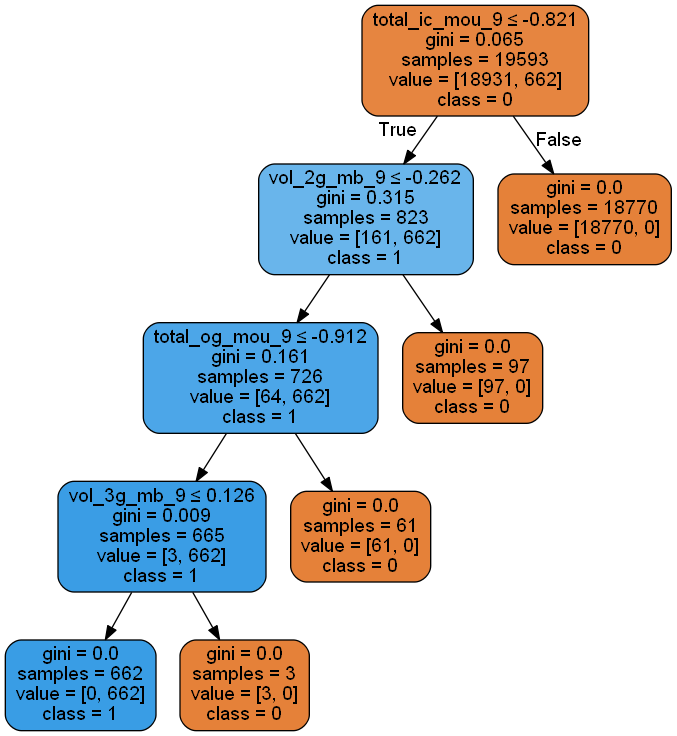

In [78]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('churns.png')
Image(graph.create_png())

In [44]:
pca.components_

array([[ 0.17346943,  0.19856885,  0.20948586, ...,  0.01249857,
         0.01682108,  0.01948512],
       [ 0.22435888,  0.26859195,  0.25353467, ...,  0.03235669,
         0.03512953,  0.03371994],
       [-0.07443501, -0.07744391, -0.05099894, ...,  0.01372448,
         0.01338589,  0.01826646],
       ...,
       [ 0.0263536 , -0.0129594 , -0.11759754, ..., -0.00425992,
         0.0071254 , -0.00472652],
       [ 0.1466359 , -0.39332282,  0.49799189, ...,  0.01347986,
        -0.01856409,  0.00995693],
       [-0.03617127,  0.11227238, -0.13140881, ..., -0.00123754,
         0.00139521, -0.00192438]])

In [43]:
# To decrease churn of high-value customers, the company can :-
# 1. 

In [49]:
import pandas as pd
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA

pd.DataFrame(pca.components_,columns=X_train.columns,index = ['PC1','PC2'])

ValueError: Shape of passed values is (32, 32), indices imply (2, 32)